# Zero To Nine - MNIST Digit Classification From Scratch

#### Introduction
Implementing a simple two layer neural network with a softmax output layer, trained on the MNIST digit dataset.

### Importing Libraries

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Loading Data

In [10]:
data = pd.read_csv('data/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Processing Data

In [11]:
# turning into a numpy array
data = np.array(data)
# getting rows and columns of data
m, n = data.shape
# shuffling data to reduce any exisiting patterns
np.random.shuffle(data)

In [17]:
# transposing the matrix
# first 1000 examples (can change this for a larger training set)
data_dev = data[0:1000].T
#  digit label
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [18]:
Y_train

array([4, 0, 1, ..., 7, 3, 2], shape=(41000,))

In [19]:
X_train[:, 0].shape

(784,)

# Developing Neural Network

2 layer architecture with a input layer of 784 units (represents the input number of pixels). Then the first hidden layer with have 10 units of ReLU activation followed by a output layer of 10 units representated by probablities from the softmax function.

In [24]:
# initing weights
def init_params():
    # init to random weights
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    # returns a probability
    return np.exp(Z) / sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, X):
    # getting dot product calculuations on the foward pass
    Z1 = W1.dot(X) + b1
    # activation funciton
    A1 = ReLU(Z1)
    # getting another dot product after the first layer
    Z2 = W2.dot(A1) + b2
    # using softmax to get out output
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0
    

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    # updating weights and biases of model on the backward pass
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
    

In [27]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X,Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2
        

In [28]:
# training the model
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[7 9 1 ... 7 7 1] [4 0 1 ... 7 3 2]
0.14058536585365855
Iteration:  10
[7 0 1 ... 7 0 6] [4 0 1 ... 7 3 2]
0.22495121951219513
Iteration:  20
[4 0 1 ... 7 0 8] [4 0 1 ... 7 3 2]
0.2888292682926829
Iteration:  30
[4 0 1 ... 7 0 8] [4 0 1 ... 7 3 2]
0.3390487804878049
Iteration:  40
[4 0 1 ... 7 0 6] [4 0 1 ... 7 3 2]
0.39351219512195124
Iteration:  50
[4 0 1 ... 7 0 6] [4 0 1 ... 7 3 2]
0.4618536585365854
Iteration:  60
[4 0 1 ... 7 3 6] [4 0 1 ... 7 3 2]
0.5197317073170732
Iteration:  70
[4 0 1 ... 7 3 6] [4 0 1 ... 7 3 2]
0.5620731707317074
Iteration:  80
[4 0 1 ... 7 3 6] [4 0 1 ... 7 3 2]
0.5969512195121951
Iteration:  90
[4 0 1 ... 7 3 6] [4 0 1 ... 7 3 2]
0.626219512195122
Iteration:  100
[4 0 1 ... 7 3 6] [4 0 1 ... 7 3 2]
0.6506341463414634
Iteration:  110
[4 0 1 ... 7 3 6] [4 0 1 ... 7 3 2]
0.6702682926829269
Iteration:  120
[4 0 1 ... 7 3 6] [4 0 1 ... 7 3 2]
0.6875853658536585
Iteration:  130
[4 0 1 ... 7 3 6] [4 0 1 ... 7 3 2]
0.7017073170731707
Iteration:  140

## Visualizing Results

In [29]:
# defining functions to viz data
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


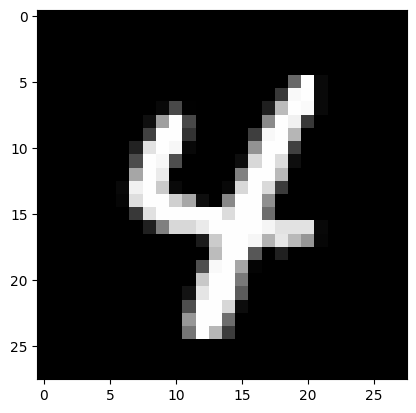

Prediction:  [0]
Label:  0


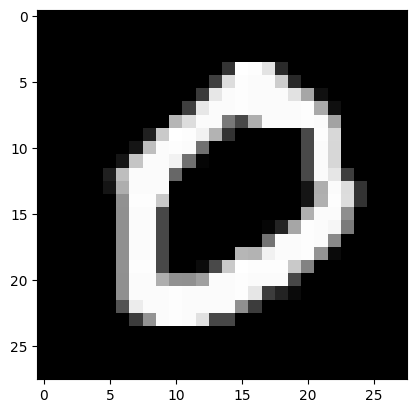

Prediction:  [1]
Label:  1


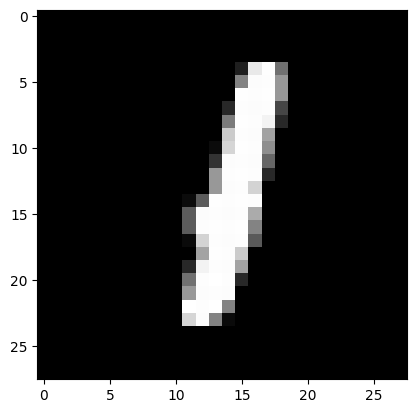

In [ ]:
# looking at the first three testing examples -> They're all right!
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)

#### Finding accuracy on dev set

In [32]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 9 6 6 1 5 5 3 9 9 5 0 8 6 8 1 5 0 6 3 6 7 8 5 6 1 5 6 2 5 6 8 4 2 7 0 7
 4 5 0 1 1 7 3 7 7 1 7 3 1 4 9 7 9 8 8 0 5 8 4 4 2 8 2 6 1 0 0 3 3 1 9 1 2
 4 2 7 8 3 6 0 9 6 4 0 4 0 1 0 4 5 8 3 3 2 8 1 8 5 8 9 4 7 7 2 6 4 0 8 8 0
 6 5 2 9 7 2 7 8 4 9 3 2 6 7 3 7 5 9 3 3 9 6 8 9 0 6 5 1 9 4 7 2 9 1 9 7 2
 9 5 5 5 5 2 0 2 4 8 1 3 3 3 2 0 8 6 1 9 1 9 7 3 3 0 6 4 1 1 6 9 8 4 8 6 8
 7 0 6 4 2 5 3 5 7 5 8 6 0 8 4 9 0 5 1 2 1 5 1 2 5 0 9 8 8 2 6 4 3 7 6 8 9
 1 4 1 2 7 3 3 7 7 6 5 4 8 6 1 0 3 7 6 1 9 1 1 0 4 4 3 7 8 6 6 6 4 1 1 7 7
 7 3 8 9 8 8 6 4 2 3 4 0 2 9 9 9 8 7 5 7 6 6 7 4 7 8 0 6 2 0 5 2 5 6 5 0 1
 4 7 8 4 4 2 9 7 4 7 5 6 1 8 6 7 0 7 1 3 3 2 6 4 0 3 3 9 7 9 7 7 9 7 7 0 6
 5 6 1 4 1 1 8 2 7 0 3 6 9 2 2 6 3 0 8 7 4 6 0 6 9 0 6 6 8 1 0 2 5 7 0 5 6
 8 2 2 4 8 2 6 1 5 4 4 9 3 9 3 5 6 7 6 4 3 3 6 1 9 3 5 4 1 5 8 9 9 3 0 9 3
 8 4 9 5 4 8 4 8 1 2 9 7 1 9 4 7 8 6 1 1 9 0 0 3 7 3 8 2 3 0 9 4 6 7 6 9 6
 8 0 2 0 5 3 7 9 3 4 2 1 7 4 8 1 5 8 0 4 4 0 8 2 1 0 8 1 4 7 3 4 6 1 2 9 3
 3 5 0 6 8 5 7 2 6 1 5 3 

np.float64(0.856)

Accuracy was ~86% which is pretty good for our simple neural network!